## Importing Important Libraries

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # The Natural Language Toolkit
import re # regular expression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
data = pd.read_csv("Reviews.csv",delimiter = ',')

## Checking Data Info

In [10]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [11]:
data.shape

(568454, 10)

In [12]:
data = data[:200]

In [13]:
data.shape

(200, 10)

In [14]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      200 non-null    int64 
 1   ProductId               200 non-null    object
 2   UserId                  200 non-null    object
 3   ProfileName             200 non-null    object
 4   HelpfulnessNumerator    200 non-null    int64 
 5   HelpfulnessDenominator  200 non-null    int64 
 6   Score                   200 non-null    int64 
 7   Time                    200 non-null    int64 
 8   Summary                 200 non-null    object
 9   Text                    200 non-null    object
dtypes: int64(5), object(5)
memory usage: 15.8+ KB


In [16]:
data['Score'].value_counts()

Score
5    137
4     26
3     18
1     12
2      7
Name: count, dtype: int64

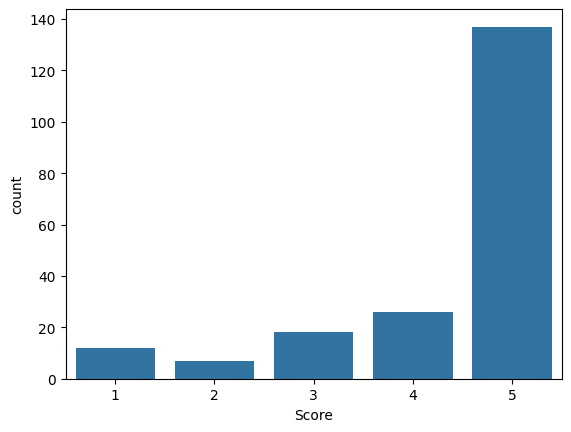

In [17]:
sns.countplot(x =data['Score'])
plt.show()

## Checking For Duplicate Values

In [18]:
subset = ['ProductId','Time','Summary','Text','UserId']
duplicates = data[data.duplicated(subset, keep = False)]
duplicates

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []

## Data Cleaning 

In [19]:
data.drop_duplicates(subset=['ProductId','UserId','Time','Summary','Text'], keep='first', inplace=True)
data.shape

(200, 10)

In [20]:
data[data['HelpfulnessNumerator']>data["HelpfulnessDenominator"]]

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []

## Feature Engineering 

In [21]:
print('Number of positive reviews: ', data[data['Score']>=3].shape[0])
print('Numbers of negative reviews: ', data[data['Score']<3].shape[0])

Number of positive reviews:  181
Numbers of negative reviews:  19


In [22]:
data['Review'] = [1 if i>=3 else 0 for i in data['Score']]
data.head(2)

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  Review  
0  I have bought several of the Vitality canned d...       1  
1  Product arrived labeled as Jumbo Salted Peanut...       0

In [23]:
def clean_text(reviews_df):
  cleaned_reviews_df = []

  for text in reviews_df:
    text = text.lower() 
    text = re.sub('<.*?>', ' ', text) # replace all HTML tags with space
    text = re.sub(r'[?|!|\'|"|#]', r'', text) # replace ?, !, ', ", and #
    text = re.sub(r'[.|,|)|(|\|/]', r' ', text) # replace |, ., ,, ), (, \, and / 
    words = [word for word in text.split() if word not in stopwords.words('english')]
    text = ' '.join(words)
    cleaned_reviews_df.append(text)

  return cleaned_reviews_df

In [24]:
data["Cleaned_Reviews"] = clean_text(data['Text'])
data["Cleaned_Reviews"]

0      bought several vitality canned dog food produc...
1      product arrived labeled jumbo salted peanuts p...
2      confection around centuries light pillowy citr...
3      looking secret ingredient robitussin believe f...
4      great taffy great price wide assortment yummy ...
                             ...                        
195    little tins sugar free mine mints great deal p...
196    pros: +packaging shipping price +sold year exp...
197    careful eat many one day one chemicals laxativ...
198    mints really strong great taste also convenien...
199    huge supply im still working plenty spare much...
Name: Cleaned_Reviews, Length: 200, dtype: object

In [25]:
data['Cleaned_Reviews'][:5]

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts p...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Cleaned_Reviews, dtype: object

In [26]:
data['Word_Count'] = data['Cleaned_Reviews'].str.split().apply(len)

In [27]:
data['Character_Count'] = data['Cleaned_Reviews'].apply(lambda x: len(x))

In [28]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Review                                    Cleaned_Reviews  Word_Count  \
0       1  bought several vitality canned dog food produc...          23   
1       0  product arrived labeled jumbo salted peanuts p...          18   
2       1  confection around centuries light pillowy citr...          42   

   Character_Count  
0              164  
1              133  
2              288

In [29]:
data['Helpfullnesspercentage'] = data[['HelpfulnessNumerator','HelpfulnessDenominator']].apply(lambda x: ((x[0]/x[1])*100) if x[1] else 0 ,axis =1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18716\951017655.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Helpfullnesspercentage'] = data[['HelpfulnessNumerator','HelpfulnessDenominator']].apply(lambda x: ((x[0]/x[1])*100) if x[1] else 0 ,axis =1)


In [30]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Review                                    Cleaned_Reviews  Word_Count  \
0       1  bought several vitality canned dog food produc...          23   
1       0  product arrived labeled jumbo salted peanuts p...          18   
2       1  confection around centuries light pillowy citr...          42   
3       0  looking secret ingredient robitussin believe f...          18   
4       1  great taffy great price wide assortment yummy ...          13   

   Character_Count  Helpfullnesspercentage  
0              164                   100.0  
1              133                     0.0  
2              288                   100.0  
3              128                   100.0  
4               83                     0.0

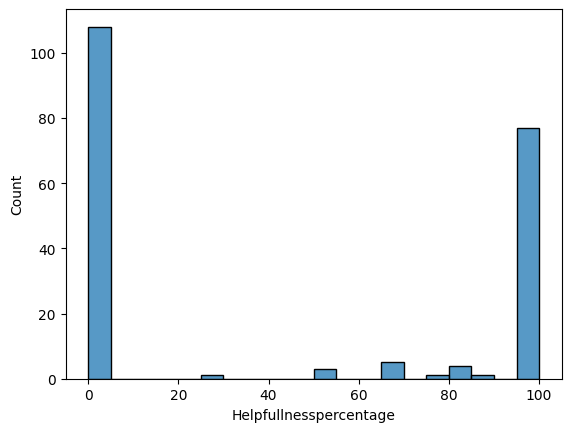

In [31]:
sns.histplot(x=data['Helpfullnesspercentage'], bins=20)
plt.show()

In [32]:
data.loc[data['Helpfullnesspercentage']>=75,'Helpfullness Indicator'] = 'Usefull'
data.loc[(data['Helpfullnesspercentage']>40) & (data["Helpfullnesspercentage"]<75),"Helpfullness Indicator"] = 'Intermediate'
data.loc[(data["Helpfullnesspercentage"] > 0) & (data["Helpfullnesspercentage"] <= 40), 'Helpfullness Indicator'] = 'Not Usefull'
data.loc[data["Helpfullnesspercentage"] == 0, 'Helpfullness Indicator'] = 'Not Available'

In [33]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Review                                    Cleaned_Reviews  Word_Count  \
0       1  bought several vitality canned dog food produc...          23   
1       0  product arrived labeled jumbo salted peanuts p...          18   
2       1  confection around centuries light pillowy citr...          42   
3       0  looking secret ingredient robitussin believe f...          18   
4       1  great taffy great price wide assortment yummy ...          13   

   Character_Count  Helpfullnesspercentage Helpfullness Indicator  
0              164                   100.0                Usefull  
1              133                     0.0          Not Available  
2              288                   100.0                Usefull  
3              128                   100.0                Usefull  
4               83                     0.0          Not Available

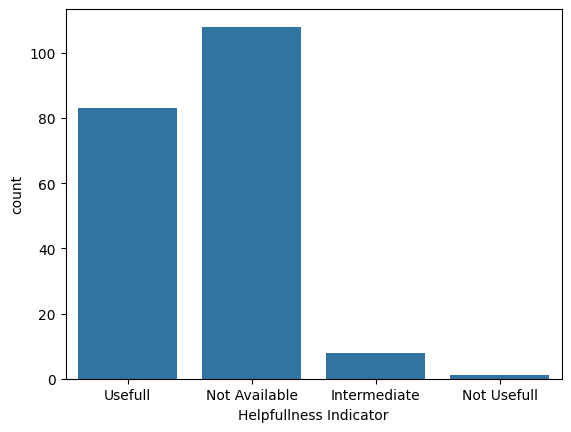

In [34]:
sns.countplot(x=data['Helpfullness Indicator'])
plt.show()

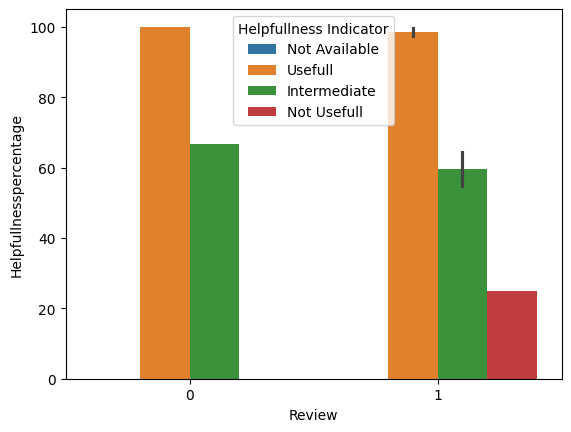

In [35]:
sns.barplot(data , x = 'Review' , y = 'Helpfullnesspercentage', hue ='Helpfullness Indicator')
plt.show()

## EDA

## Making word cloud for all reviews 

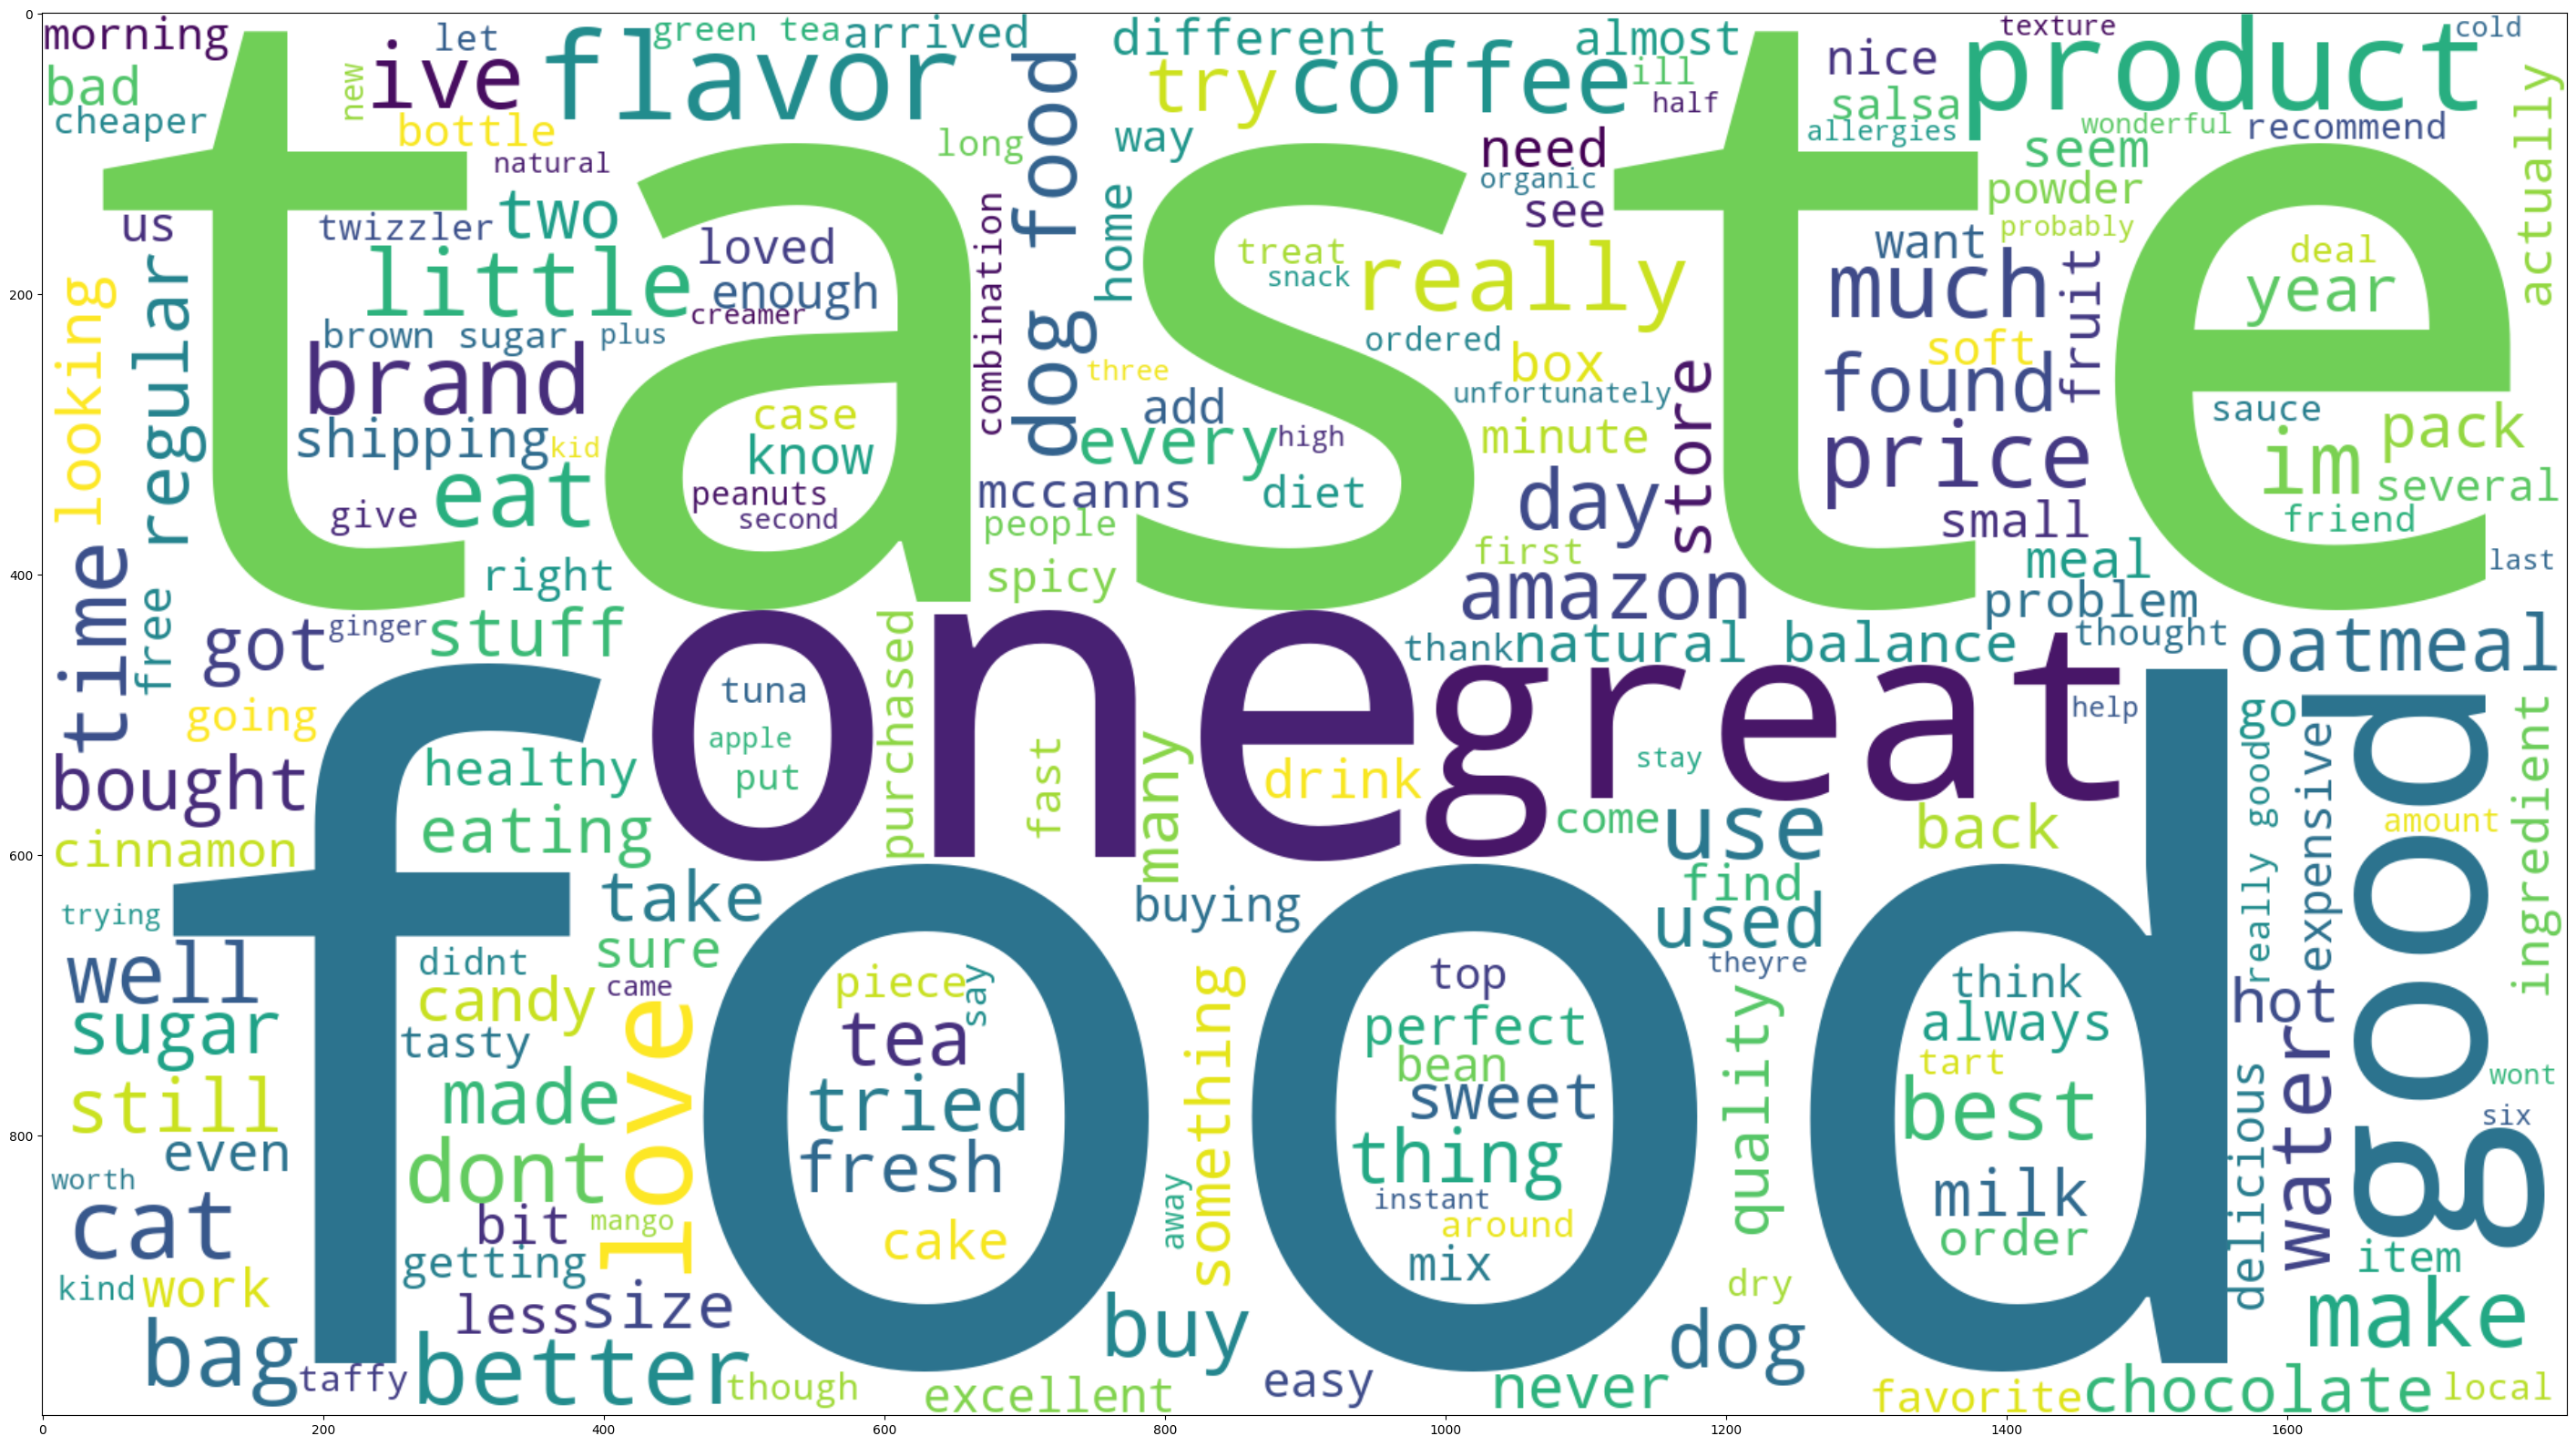

In [36]:
all_text = ' '.join([text for text in data["Cleaned_Reviews"]])

wordcloud = WordCloud(height=1000 , width= 1800,background_color="white").generate(all_text)
plt.figure(figsize=(40,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

## Finding the most common words in reviews 

## Positive Words

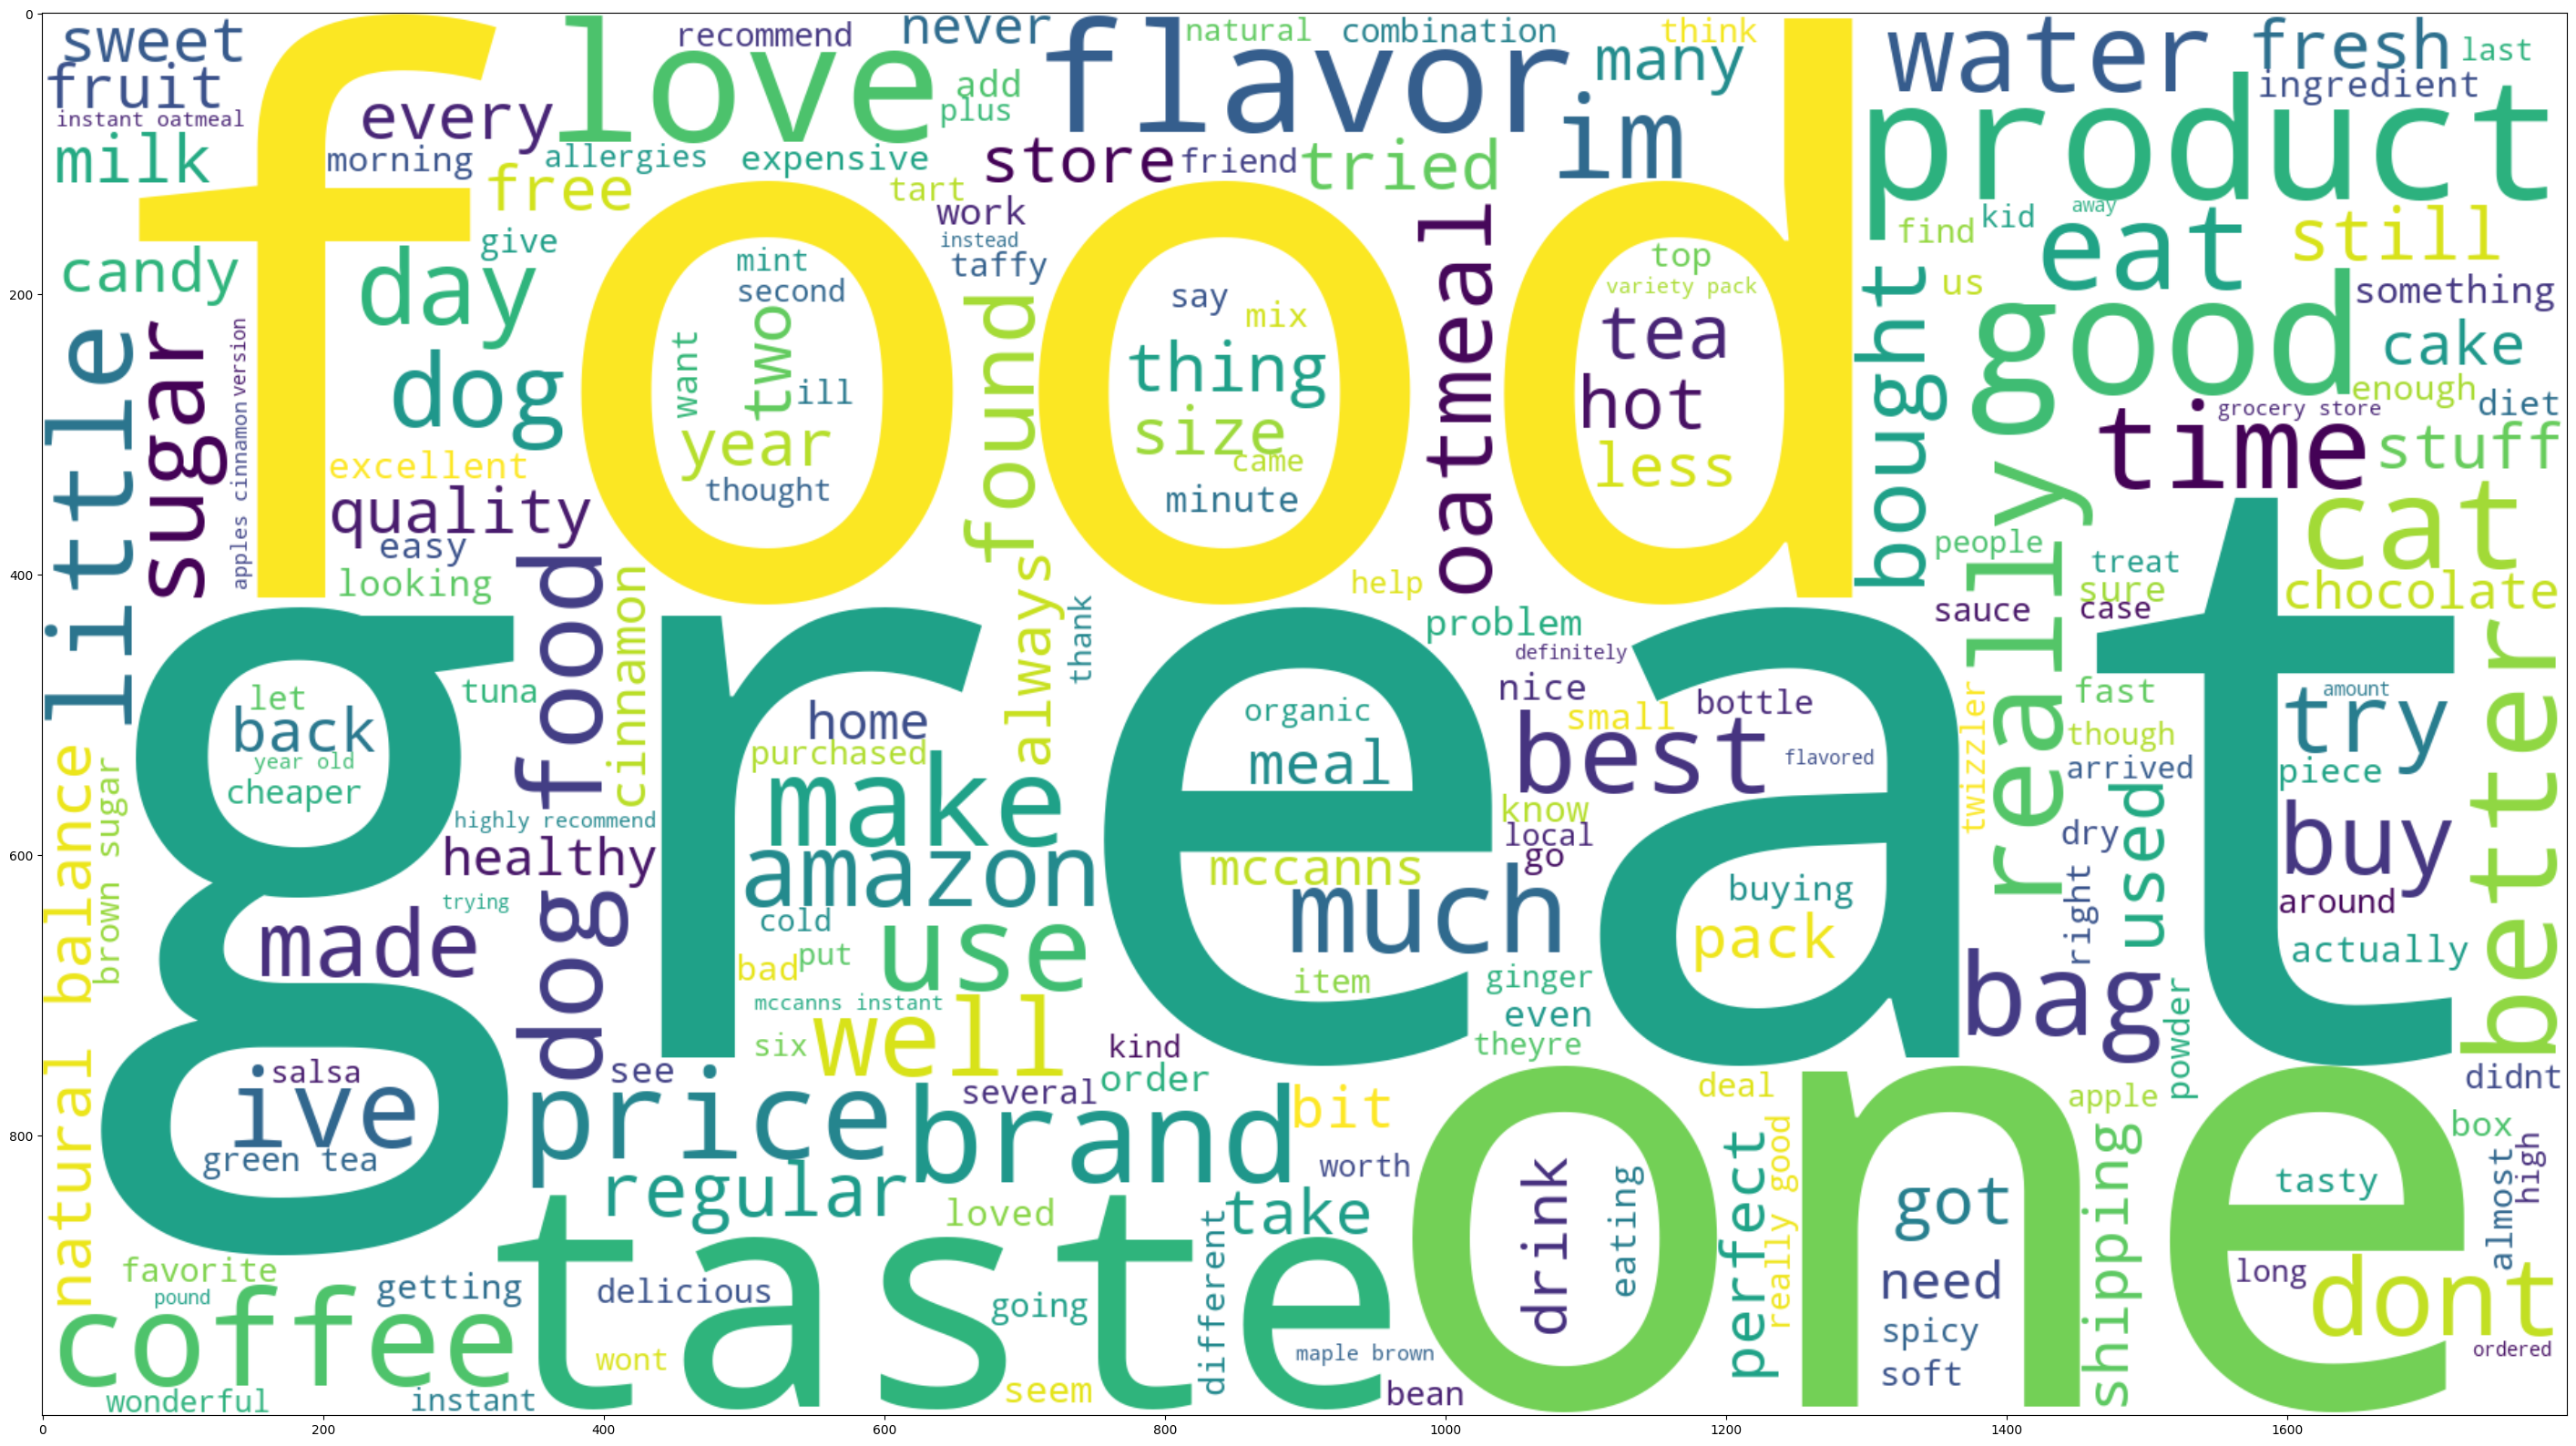

In [37]:
positive_words = ' '.join(word for word in data['Cleaned_Reviews'][data['Review']==1])

word_cloud = WordCloud(width=1800, height=1000,background_color='white').generate(positive_words)
plt.figure(figsize=(40,20))
plt.imshow(word_cloud ,interpolation='bilinear')
plt.show()

## Negative Words

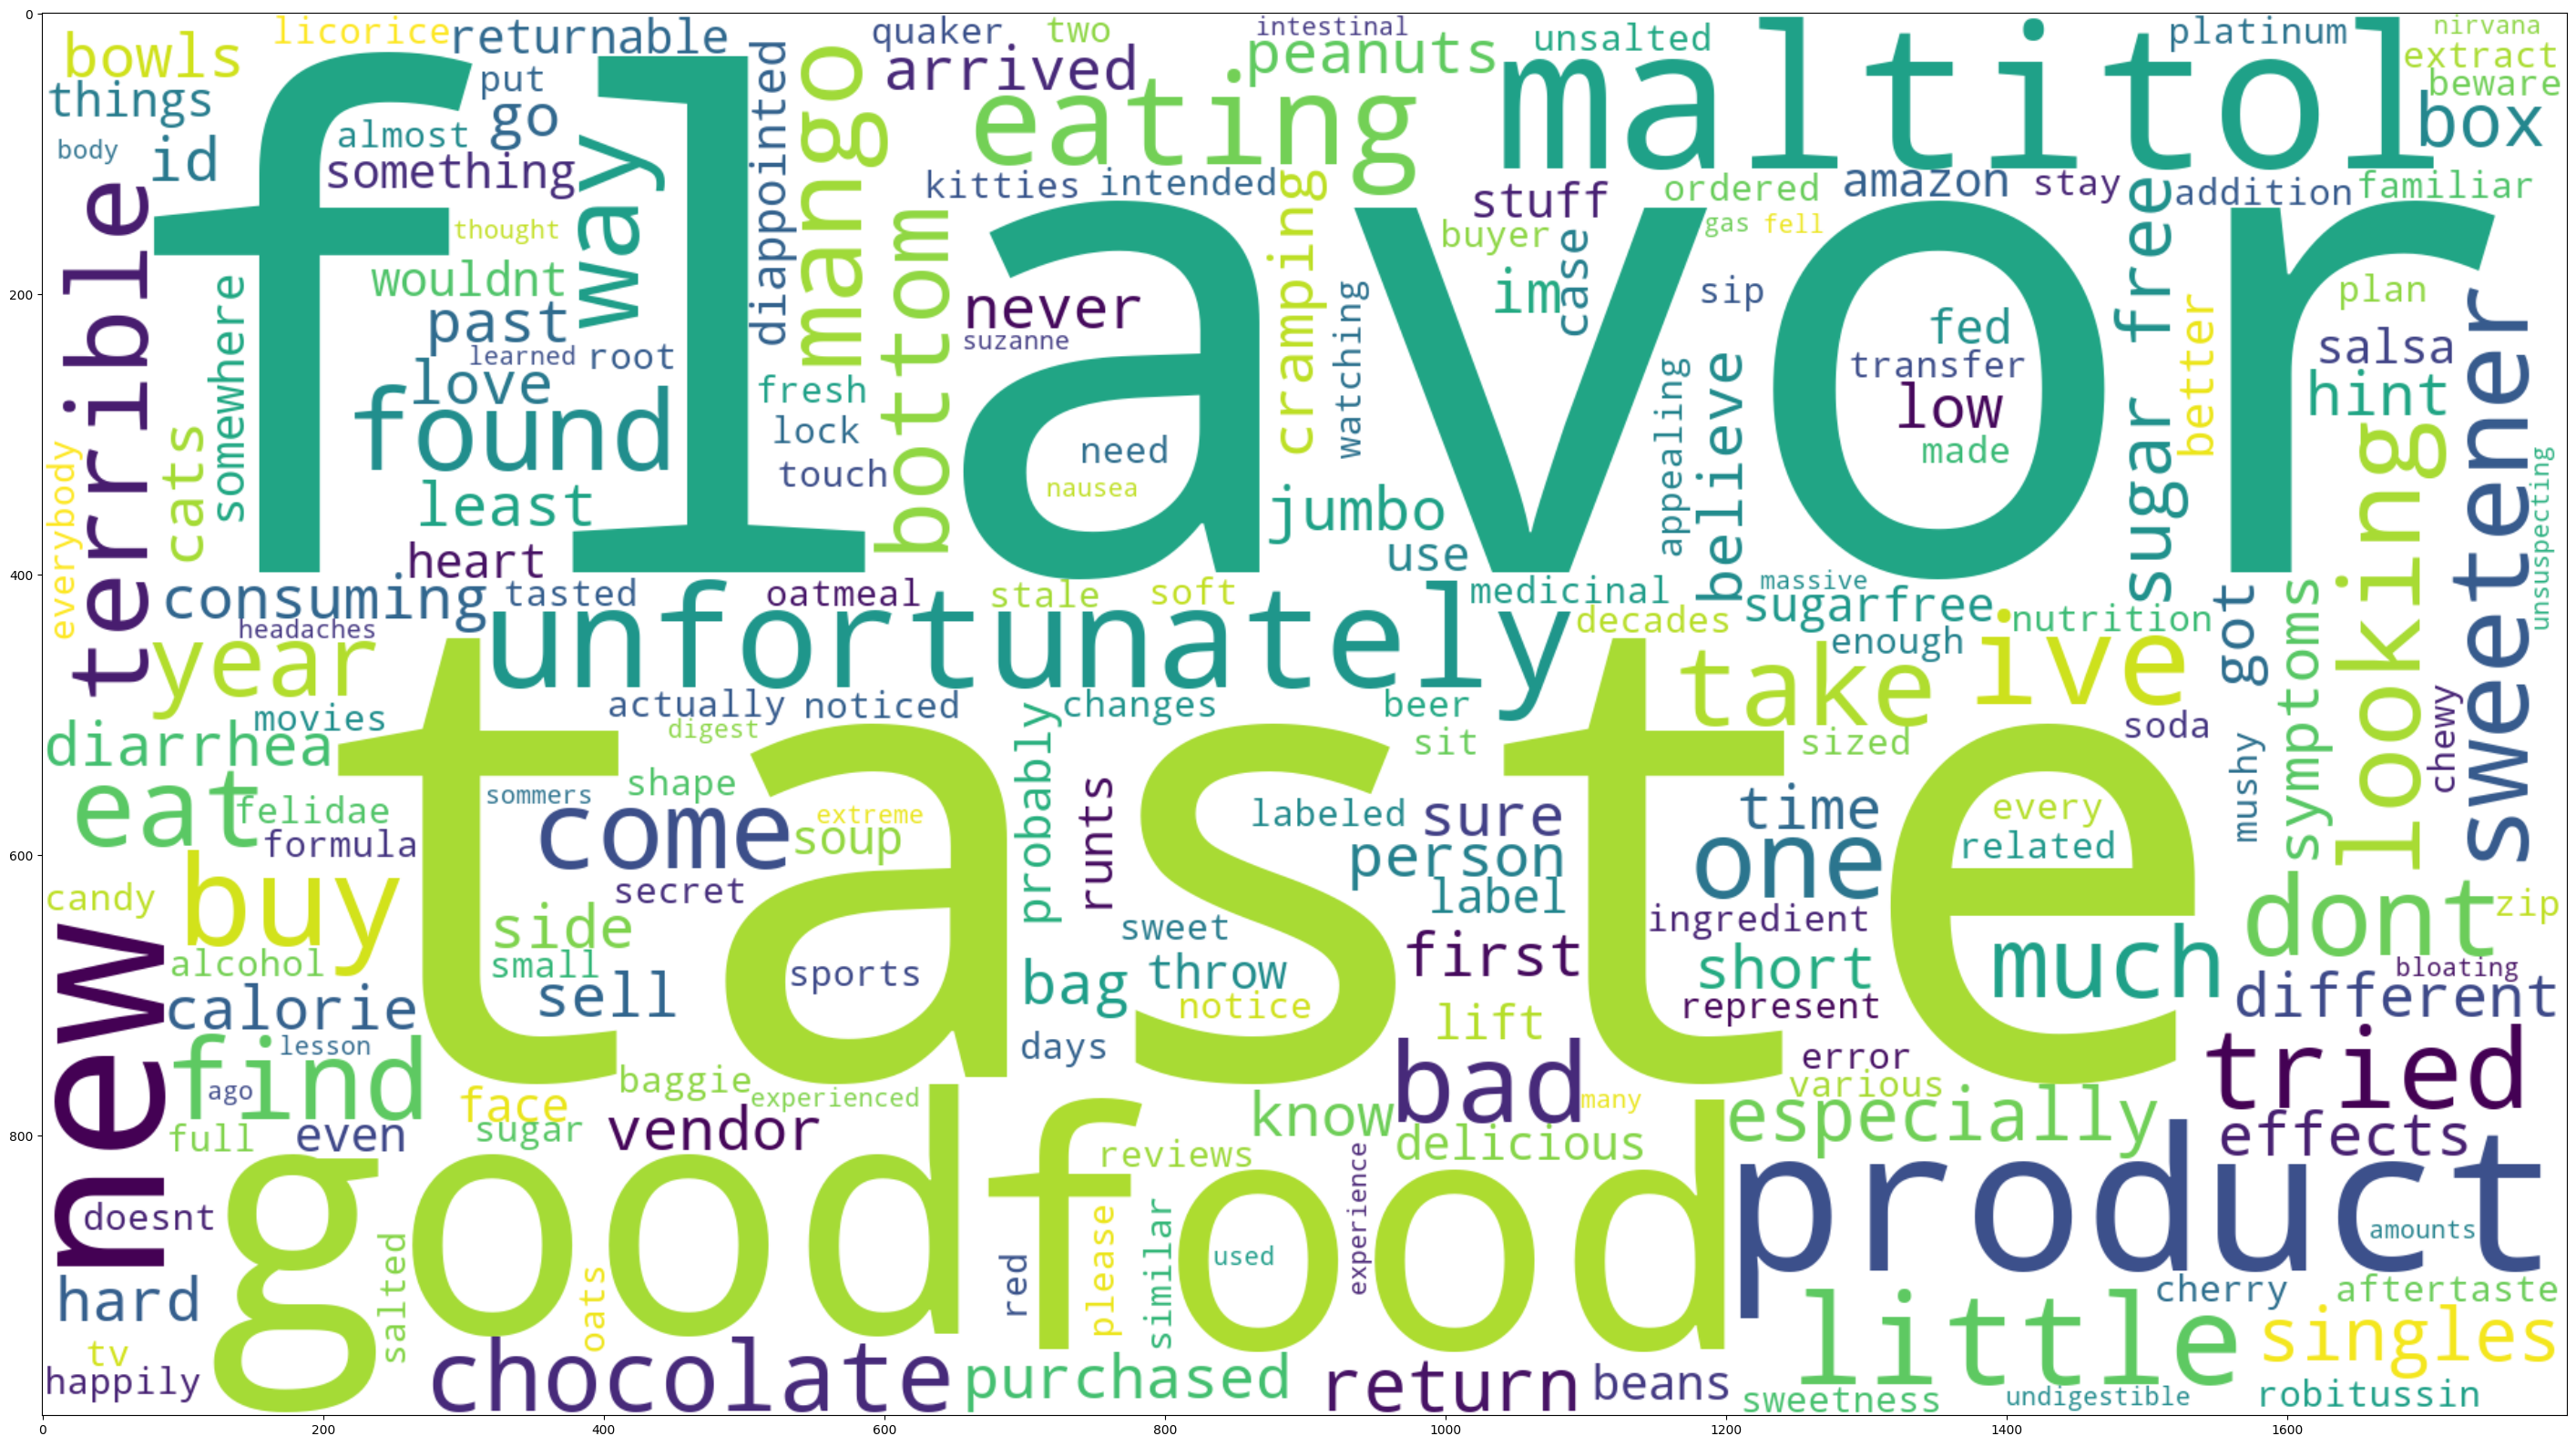

In [38]:
negative_words = ' '.join(word for word in data["Cleaned_Reviews"][data["Review"]==0])

word_cloud = WordCloud(width=1800, height=1000,background_color='white').generate(negative_words)

plt.figure(figsize=(40,20))
plt.imshow(word_cloud , interpolation = 'bilinear')
plt.show()

In [39]:
word_freq ={}
token = word_tokenize(negative_words)
for t in token:
    if t not in word_freq.keys():
        word_freq[t]=1
    else :
        word_freq[t]+=1


In [40]:
word_freq

{'product': 3,
 'arrived': 2,
 'labeled': 1,
 'jumbo': 2,
 'salted': 1,
 'peanuts': 2,
 'actually': 1,
 'small': 1,
 'sized': 1,
 'unsalted': 1,
 'sure': 2,
 'error': 1,
 'vendor': 2,
 'intended': 1,
 'represent': 1,
 'looking': 3,
 'secret': 1,
 'ingredient': 1,
 'robitussin': 1,
 'believe': 2,
 'found': 3,
 'got': 2,
 'addition': 1,
 'root': 1,
 'beer': 1,
 'extract': 1,
 'ordered': 1,
 'good': 7,
 'made': 1,
 'cherry': 1,
 'soda': 1,
 'flavor': 9,
 'medicinal': 1,
 'cats': 2,
 'happily': 1,
 'eating': 4,
 'felidae': 1,
 'platinum': 1,
 'two': 1,
 'years': 2,
 'new': 6,
 'bag': 1,
 'shape': 1,
 'food': 7,
 'different': 2,
 'tried': 3,
 'first': 2,
 'put': 1,
 'bowls': 2,
 'sit': 1,
 'full': 1,
 'kitties': 1,
 'touch': 1,
 'ive': 4,
 'noticed': 1,
 'similar': 1,
 'reviews': 1,
 'related': 1,
 'formula': 1,
 'changes': 1,
 'past': 2,
 'unfortunately': 5,
 'need': 1,
 'find': 3,
 'eat': 3,
 'love': 2,
 'watching': 1,
 'tv': 1,
 'movies': 1,
 'sweet': 1,
 'like': 12,
 'transfer': 1,
 'zi

In [41]:
len(word_freq)

407

In [42]:
top_200_words = heapq.nlargest(200, word_freq, key=word_freq.get)

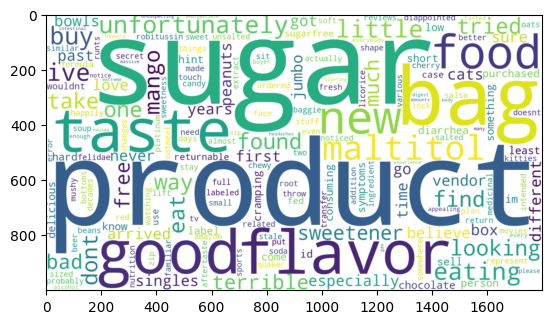

In [43]:
most_freq_final = ' '.join(word for word in top_200_words )
wordcloud_top_200 = WordCloud(width=1800, height=1000, background_color="white").generate(most_freq_final)
plt.imshow(wordcloud_top_200, interpolation='bilinear')

plt.show()


## Data Processing 

In [44]:
ps = PorterStemmer()
final_x = []
for text in data["Cleaned_Reviews"]:
    word = [ps.stem(word) for word in text.split()]
    final_x.append(word)

final_x[0]

['bought',
 'sever',
 'vital',
 'can',
 'dog',
 'food',
 'product',
 'found',
 'good',
 'qualiti',
 'product',
 'look',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicki',
 'appreci',
 'product',
 'better']

In [45]:
final_y = data["Review"]

## Creating bag of words

In [46]:
stemmed_x = []
for line in final_x:
    sentence = ''
    for word in line:
        sentence = sentence + " " + word
    stemmed_x.append(sentence.strip())

In [47]:
stemmed_x[:5]

['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo',
 'confect around centuri light pillowi citru gelatin nut - case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor highli recommend yummi treat familiar stori c lewi lion witch wardrob - treat seduc edmund sell brother sister witch',
 'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal']

In [48]:
count_vec = CountVectorizer(max_features=100)
final_x = count_vec.fit_transform(stemmed_x)
final_x = final_x.toarray()
print(final_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


## Applying PCA to the dataset 

In [49]:
pca = PCA(n_components=2)

pca_x = pca.fit_transform(final_x)

pca_x 

array([[ 1.75444211e-01, -6.48396123e-01],
       [-1.00351935e+00,  1.05522545e-01],
       [-9.51199864e-01,  9.41612421e-02],
       [-8.36848070e-01,  1.71281915e-01],
       [-1.11583245e+00,  1.33560705e-01],
       [-6.41164342e-01,  1.84121605e-01],
       [-9.06772140e-01,  6.41592804e-02],
       [-7.76593346e-01,  1.01036397e-01],
       [-8.85024127e-01, -4.02649877e-01],
       [ 3.09826564e-01, -1.24718091e+00],
       [ 1.32824473e-01,  6.91510909e-01],
       [ 9.36745463e-01, -2.13625069e+00],
       [ 1.58630185e+00, -2.99824615e+00],
       [-8.77896029e-01,  1.44550618e-01],
       [-1.16409324e+00,  3.58458883e-03],
       [-1.01912413e+00, -3.00690636e-02],
       [-4.51320975e-01, -1.04937147e-01],
       [-1.15959730e+00, -2.46568284e-03],
       [-3.61780543e-01,  4.17961384e-01],
       [-1.07593563e+00,  2.34251225e-02],
       [-7.08689234e-01,  2.11971984e-01],
       [-5.53539086e-01,  3.63944558e-01],
       [-8.87755084e-01,  1.71350840e-03],
       [-1.

## Applying Smote to balance dataset 

In [50]:
print(pca_x.shape)
print(final_y.shape)

(200, 2)
(200,)


In [51]:
smote = SMOTE(random_state  = 0)
x_resample  , y_resample  = smote.fit_resample(pca_x, final_y)

In [52]:
print(x_resample.shape)
y_resample.shape

(362, 2)


(362,)

## Feature Engineering 

In [53]:
data["Stemmed Text"] = stemmed_x

In [54]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Review                                    Cleaned_Reviews  Word_Count  \
0       1  bought several vitality canned dog food produc...          23   
1       0  product arrived labeled jumbo salted peanuts p...          18   
2       1  confection around centuries light pillowy citr...          42   
3       0  looking secret ingredient robitussin believe f...          18   
4       1  great taffy great price wide assortment yummy ...          13   

   Character_Count  Helpfullnesspercentage Helpfullness Indicator  \
0              164                   100.0                Usefull   
1              133                     0.0          Not Available   
2              288                   100.0                Usefull   
3              128                   100.0                Usefull   
4               83                     0.0          Not Available   

                                        Stemmed Text  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut peanut a...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great price wide assort yummi taff...

## Model Evaluating 

In [55]:
x_train, x_test, y_train , y_test = train_test_split(x_resample, y_resample,random_state = 0,test_size = 0.2)
print(x_train.shape)
print(x_test.shape)

(289, 2)
(73, 2)


## Logistic Regression 

In [56]:
lr = LogisticRegression(C=1e5 , tol =0.1 )
model = lr.fit(x_train , y_train)
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [57]:
y_test = np.array(y_test)
print(np.concatenate((prediction.reshape(len(prediction),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]]


## prediction on test set 

In [58]:
accuracy = accuracy_score(prediction , y_test)
print("The accuracy of the model on the test set is :", accuracy)

The accuracy of the model on the test set is : 0.4657534246575342


## Training on Train set 

In [59]:
predict = model.predict(x_train)
accuracy_train = accuracy_score(predict ,y_train)
print("The Accuracy of the model on train set is :",accuracy_train)

The Accuracy of the model on train set is : 0.5363321799307958


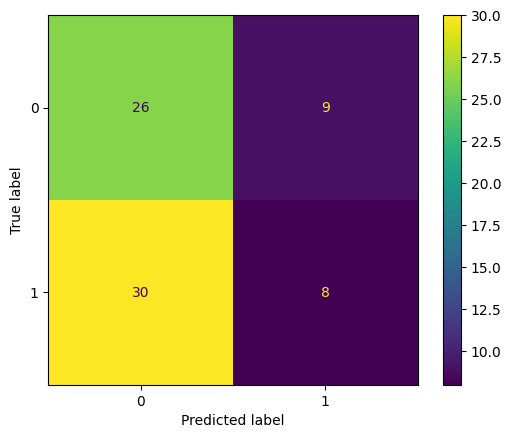

In [60]:
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Building KNN Model

In [61]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')

In [62]:
model_knn = knn.fit(x_train , y_train)

## Predicting model on test set 

In [63]:
y_pred = model.predict(x_test)

## Predicting on train set 

In [64]:
y_pred_train = model.predict(x_train)

## Testing the model performance 

In [65]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]]


In [66]:
## Accuracy on test set 
accuracy  = accuracy_score(y_pred , y_test)
accuracy

0.4657534246575342

In [67]:
## Accuracy on train set 
accuracy_train  = accuracy_score(y_pred_train, y_train)
accuracy_train

0.5363321799307958

## building Decision tree model 

In [68]:
dtree = DecisionTreeClassifier(splitter='random',random_state = 0,criterion='gini')

In [69]:

model_tree = dtree.fit(x_train , y_train)

## Predicting model on test set 

In [70]:
y_pred = model_tree.predict(x_test)

## Predicting on train set 

In [71]:
y_pred_train = model_tree.predict(x_train)

## Testing the model performance 

In [72]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [73]:
## Accuracy on test set 
accuracy  = accuracy_score(y_pred , y_test)
accuracy

0.726027397260274

In [74]:
## Accuracy on train set 
accuracy_train  = accuracy_score(y_pred_train, y_train)
accuracy_train

1.0

## Evaluating random forest model 

In [75]:
forest = RandomForestClassifier(n_estimators=70,criterion='gini',random_state=44)
model_random = forest.fit(x_train , y_train)
y_pred = model_random.predict(x_test)
y_pred_train = model_random.predict(x_train)
## Accuracy on test set 
accuracy  = accuracy_score(y_pred , y_test)
print('Accuracy on test set is :' ,accuracy)
## Accuracy on train set 
accuracy_train  = accuracy_score(y_pred_train, y_train)
print('Accuracy on the train set is : ',accuracy_train)

Accuracy on test set is : 0.7808219178082192
Accuracy on the train set is :  1.0


## Evaluating Naive Bayes model 

In [76]:
naive = GaussianNB()
model_random = naive.fit(x_train , y_train)
y_pred = model_random.predict(x_test)
y_pred_train = model_random.predict(x_train)
## Accuracy on test set 
accuracy  = accuracy_score(y_pred , y_test)
print('Accuracy on test set is :' ,accuracy)
## Accuracy on train set 
accuracy_train  = accuracy_score(y_pred_train, y_train)
print('Accuracy on the train set is : ',accuracy_train)

Accuracy on test set is : 0.5342465753424658
Accuracy on the train set is :  0.5467128027681661
